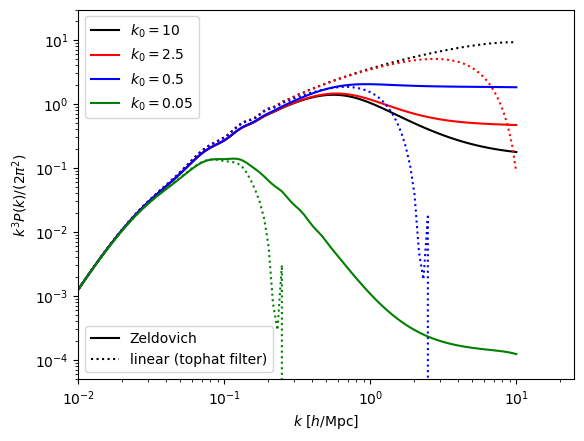

In [1]:
import matplotlib.pyplot as plt
from itertools import cycle
import sys
import numpy as np
import pkza 

# set number of terms in expansion (5 is usually enough)
N = 5

# define the filter to truncate the power spectrum with, in this case a tophat in real space
def myfilter(k,k0):
    from scipy.special import spherical_jn 
    x = k/k0
    val = 9 * spherical_jn(1, x, derivative=False)**2 / x**2
    return val

# initialize pkza object and set wavenumbers to plot
pk = pkza.pkza.pkza(kfilter=myfilter)
k = np.logspace(-2,1,100)

# plotting stuff
linleg=[]
zeleg=[]
colors = cycle(['k','r','b','g'])

# now loop over k0 values to use in the filter above and calculate the Zeldovich power spectrum for each
for k0 in [10,2.5,0.5,0.05]:
    kp = k
    lkp = np.log(kp)
    c = next(colors)
    # get the Zeldovich power spectrum as well as the (truncated) input linear power spectrum
    pzel, plin = pk.pzel(kp,k0,N)
    plt.loglog(kp,kp**3*plin/(2.*np.pi**2),ls=':',c=c)
    line, = plt.loglog(kp,kp**3*pzel[:,0]/(2.*np.pi**2),label=r'$k_0=$'+str(k0),c=c); zeleg.append(line)

ax = plt.gca()
ax.set_xlim((1e-2,2.5e1))
ax.set_ylim((5e-5,3e1))

ax.set_xlabel(r'$k\ [h/{\rm Mpc}]$')
ax.set_ylabel(r'$k^3P(k)/(2\pi^2)$')

# legend stuff
line, = plt.loglog(pk.ka0,-pk.plin0,c='k',ls='-',label='Zeldovich'); linleg.append(line)
line, = plt.loglog(pk.ka0,-pk.plin0,c='k',ls=':',label='linear (tophat filter)'); linleg.append(line)

first_legend = ax.legend(handles=zeleg, loc='upper left')

# Add the second legend
second_legend = plt.legend(handles=linleg, loc='lower left')

# Manually add the first legend back to the plot
ax.add_artist(first_legend)